# Practial 17 - Perform user behavior segmentation on mobile web data using clustering (K-means).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

In [ ]:
df = pd.read_csv('/content/user_behavior_dataset.csv')

print(df.head())
print(df.info())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

In [ ]:
df.drop(['User ID'], axis=1, inplace=True)

In [ ]:
label_encoders = {}
categorical_columns = ['Gender', 'Operating System', 'Device Model']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
features = [
    'App Usage Time (min/day)', 'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)', 'Number of Apps Installed',
    'Data Usage (MB/day)', 'Age', 'Gender', 'Operating System', 'Device Model'
]

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

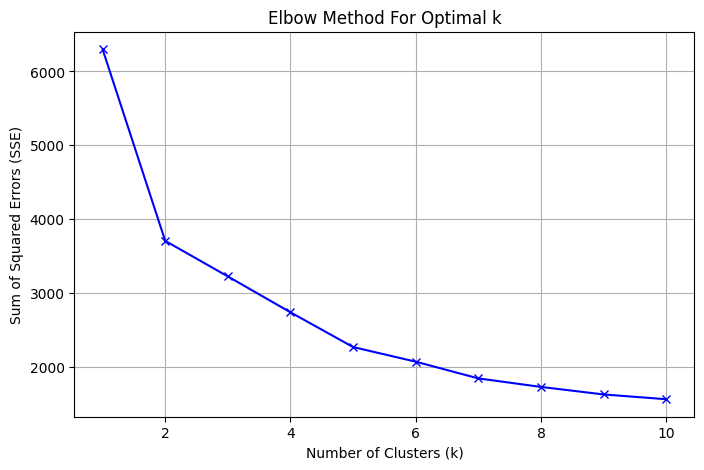

In [ ]:
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

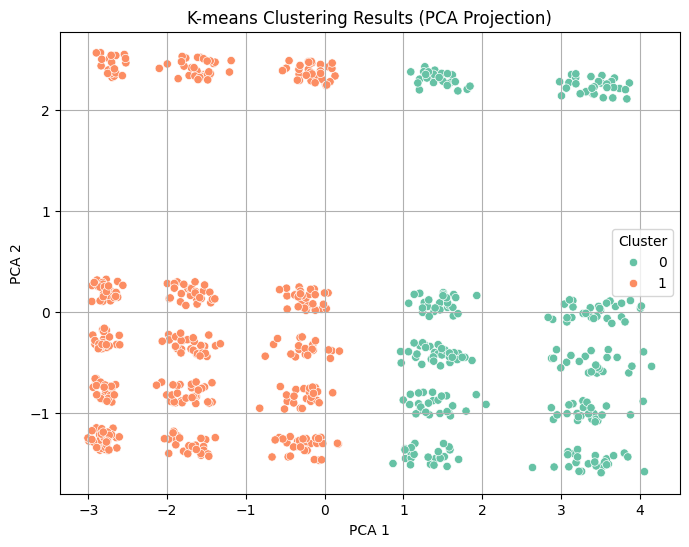

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('K-means Clustering Results (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
cluster_profiles = df.groupby('Cluster')[features].mean()
print("Cluster Profiles:\n", cluster_profiles)

Cluster Profiles:
          App Usage Time (min/day)  Screen On Time (hours/day)  \
Cluster                                                         
0                      467.789091                    8.494545   
1                      143.877647                    3.188000   

         Battery Drain (mAh/day)  Number of Apps Installed  \
Cluster                                                      
0                    2400.163636                 79.480000   
1                     958.978824                 32.047059   

         Data Usage (MB/day)        Age    Gender  Operating System  \
Cluster                                                               
0                1599.450909  38.429091  0.538182          0.218182   
1                 496.402353  38.517647  0.508235          0.202353   

         Device Model  
Cluster                
0            2.080000  
1            1.997647  
